In [4]:
# Importing modules
import pandas as pd

papers = pd.read_csv('/Users/shionguha/Documents/GitHub/data/papers.csv')# Print head
papers.head()

,id,year,title,event_type,pdf_name,abstract,paper_text
0,1,1987,Self-Organization of Associative Database and ...,NaN,1-self-organization-of-associative-database-an...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1,10,1987,A Mean Field Theory of Layer IV of Visual Cort...,NaN,10-a-mean-field-theory-of-layer-iv-of-visual-c...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2,100,1988,Storing Covariance by the Associative Long-Ter...,NaN,100-storing-covariance-by-the-associative-long...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
3,1000,1994,Bayesian Query Construction for Neural Network...,NaN,1000-bayesian-query-construction-for-neural-ne...,Abstract Missing,Bayesian Query Construction for Neural\nNetwor...
4,1001,1994,"Neural Network Ensembles, Cross Validation, an...",NaN,1001-neural-network-ensembles-cross-validation...,Abstract Missing,"Neural Network Ensembles, Cross\nValidation, a..."


In [5]:
# Remove the columns
papers = papers.drop(columns=['id', 'event_type', 'pdf_name'], axis=1).sample(100)

# Print out the first rows of papers
papers.head()

,year,title,abstract,paper_text
2647,1990,Basis-Function Trees as a Generalization of Lo...,Abstract Missing,Basis-Function Trees as a Generalization of Lo...
2200,2006,Stochastic Relational Models for Discriminativ...,Abstract Missing,Stochastic Relational Models\nfor Discriminati...
2372,2006,Isotonic Conditional Random Fields and Local S...,Abstract Missing,Isotonic Conditional Random Fields\nand Local ...
1287,2002,VIBES: A Variational Inference Engine for Baye...,Abstract Missing,VIBES: A Variational Inference\nEngine for Bay...
2604,2007,CPR for CSPs: A Probabilistic Relaxation of Co...,This paper proposes constraint propagation rel...,CPR for CSPs: A Probabilistic Relaxation of\nC...


In [6]:
# Load the regular expression library
import re

# Remove punctuation
papers['paper_text_processed'] = \
papers['paper_text'].map(lambda x: re.sub('[,\.!?]', '', x))

# Convert the titles to lowercase
papers['paper_text_processed'] = \
papers['paper_text_processed'].map(lambda x: x.lower())

# Print out the first rows of papers
papers['paper_text_processed'].head()

2647    basis-function trees as a generalization of lo...
2200    stochastic relational models\nfor discriminati...
2372    isotonic conditional random fields\nand local ...
1287    vibes: a variational inference\nengine for bay...
2604    cpr for csps: a probabilistic relaxation of\nc...
Name: paper_text_processed, dtype: object

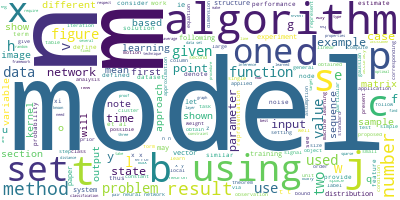

In [8]:
# Import the wordcloud library
from wordcloud import WordCloud

# Join the different processed titles together.
long_string = ','.join(list(papers['paper_text_processed'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

In [9]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
        
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]

data = papers.paper_text_processed.values.tolist()
data_words = list(sent_to_words(data))

# remove stop words
data_words = remove_stopwords(data_words)

print(data_words[:1][0][:30])

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shionguha/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['basis', 'function', 'trees', 'generalization', 'local', 'variable', 'selection', 'methods', 'function', 'approximation', 'terence', 'sanger', 'dept', 'electrical', 'engineering', 'computer', 'science', 'massachusetts', 'institute', 'technology', 'cambridge', 'abstract', 'local', 'variable', 'selection', 'proven', 'powerful', 'technique', 'approximating', 'functions']


In [10]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(data_words)

# Create Corpus
texts = data_words# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 2), (5, 4), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 2), (13, 2), (14, 3), (15, 4), (16, 1), (17, 3), (18, 9), (19, 18), (20, 3), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


In [11]:
from pprint import pprint

# number of topics
num_topics = 10

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.006*"learning" + 0.006*"model" + 0.005*"data" + 0.004*"function" + '
  '0.004*"algorithm" + 0.004*"set" + 0.003*"one" + 0.003*"using" + 0.003*"two" '
  '+ 0.003*"time"'),
 (1,
  '0.007*"model" + 0.006*"learning" + 0.005*"algorithm" + 0.005*"data" + '
  '0.004*"figure" + 0.004*"set" + 0.004*"time" + 0.003*"number" + 0.003*"two" '
  '+ 0.003*"one"'),
 (2,
  '0.007*"model" + 0.006*"data" + 0.005*"learning" + 0.004*"algorithm" + '
  '0.004*"models" + 0.004*"using" + 0.004*"set" + 0.003*"number" + '
  '0.003*"function" + 0.003*"one"'),
 (3,
  '0.007*"learning" + 0.006*"model" + 0.005*"set" + 0.005*"data" + '
  '0.005*"algorithm" + 0.005*"time" + 0.003*"using" + 0.003*"function" + '
  '0.003*"two" + 0.003*"figure"'),
 (4,
  '0.006*"model" + 0.006*"learning" + 0.005*"set" + 0.004*"algorithm" + '
  '0.004*"function" + 0.004*"one" + 0.004*"kernel" + 0.004*"using" + '
  '0.004*"data" + 0.003*"results"'),
 (5,
  '0.007*"model" + 0.006*"data" + 0.005*"algorithm" + 0.004*"using" + '
  '0.

In [20]:
#calculating model perplexity

perplexity = lda_model.log_perplexity(corpus)

In [21]:
#printing model perplexity

print(perplexity)

-8.825714024285817
